Step 1: Load and Preview the Dataset
we load the `student-mat.csv` dataset, which contains performance data of students enrolled in a Mathematics course.

Key columns include:
- `G1`, `G2`, `G3`: Grades from three academic periods.
- `studytime`: Weekly study time (1 = <2 hours, 2 = 2–5 hours, 3 = 5–10 hours, 4 = >10 hours).
- `sex`: Gender of the student (Male/Female).

We'll preview the data and check its basic structure.


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("student-mat.csv", sep=";")
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


step 2 :

Checking for any missing values which could affect analysis accuracy.

Reviewing the data types of each column to ensure appropriate handling of numerical and categorical data.

Understanding the dataset’s dimensions (number of rows and columns) to evaluate its size and scope.



In [17]:
missing_values = data.isnull().sum()
print("Columns with missing values:",missing_values[missing_values > 0])

print("data types :")
print(data.dtypes)

print(f"The dataset contains {data.shape[0]} rows and {data.shape[1]} columns.")


Columns with missing values: Series([], dtype: int64)
data types :
school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object
The dataset contains 395 rows and 33 columns.


step 3 :
we need to filter out the missing data by removing the missing columns

In [18]:
#step 3 :
data = data.dropna() # drops the rows with at least one missing Nan value
data = data.drop_duplicates() # delets every dupliacte record

step 4: answers to the questions marked below:
1. What is the average score in math (G3)?
2. How many students scored above 15 in their final grade (G3)?
3. Is there a correlation between study time (study time) and the final grade (G3)?
4. Which gender has a higher average final grade (G3)?

In [19]:
avg_g3 = data['G3'].mean()
print("The average score in maths (G3) is ;", avg_g3)

The average score in maths (G3) is ; 10.415189873417722


In [20]:
above_15 = (data['G3']>15).sum()
print("count of students above 15 in their final grade are : ", above_15)

count of students above 15 in their final grade are :  40


In [22]:
correlation = data['studytime'].corr(data['G3'])

print("Correlation between study time and final grade (G3):", round(correlation, 3))

Correlation between study time and final grade (G3): 0.098


In [23]:
avg_g3_by_gender = data.groupby('sex')['G3'].mean()

print("Average final grade (G3) by gender:")
print(avg_g3_by_gender) 

Average final grade (G3) by gender:
sex
F     9.966346
M    10.914439
Name: G3, dtype: float64


now step 5 : the visualtion of data through
*histogram of final grade (G3)
*a scatter plot between study time (study time) and final grade (G3)
*a bar chart comparing the average scores of male and female students.

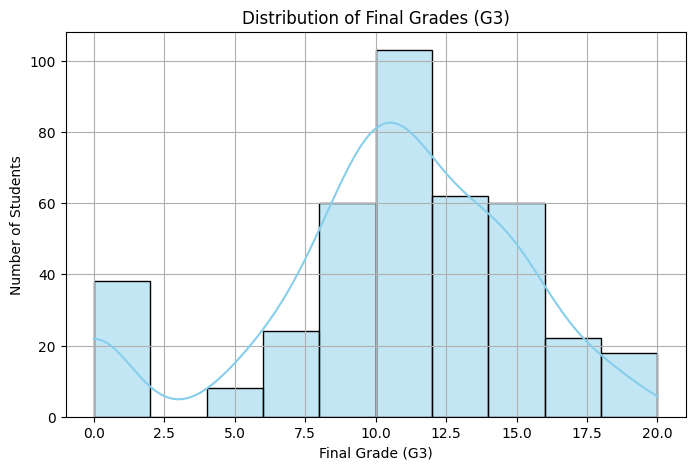

In [24]:
#step 5
plt.figure(figsize=(8, 5))
sns.histplot(data['G3'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Final Grades (G3)')
plt.xlabel('Final Grade (G3)')
plt.ylabel('Number of Students')
plt.grid(True)
plt.show()


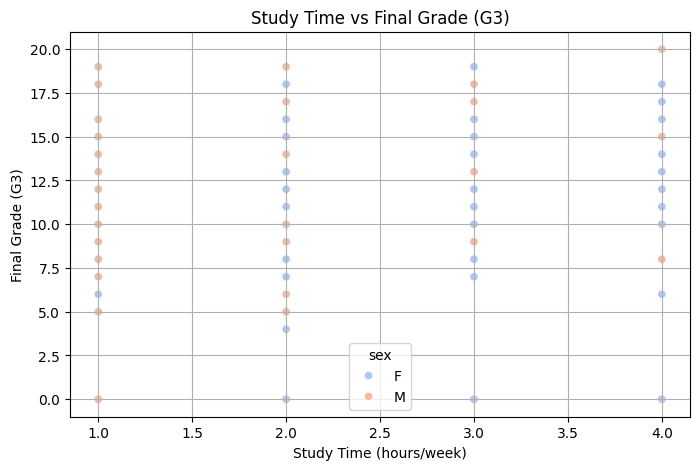

In [25]:
#scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='studytime', y='G3', hue='sex', palette='coolwarm')
plt.title('Study Time vs Final Grade (G3)')
plt.xlabel('Study Time (hours/week)')
plt.ylabel('Final Grade (G3)')
plt.grid(True)
plt.show()

C:\Users\Aryan Singh\AppData\Local\Temp\ipykernel_25084\1439026667.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_g3_gender, x='sex', y='G3', palette='pastel')


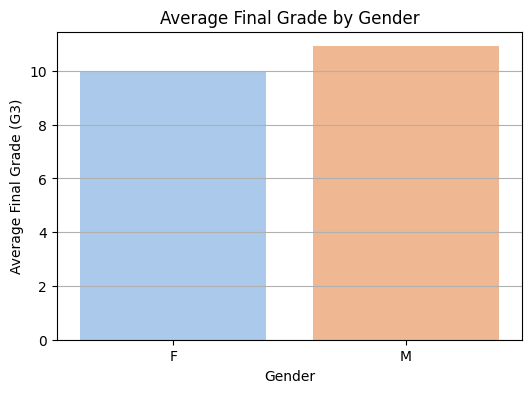

In [26]:
#bar chart
avg_g3_gender = data.groupby('sex')['G3'].mean().reset_index()

# Bar plot
plt.figure(figsize=(6, 4))
sns.barplot(data=avg_g3_gender, x='sex', y='G3', palette='pastel')
plt.title('Average Final Grade by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Final Grade (G3)')
plt.grid(True, axis='y')
plt.show()